다항 회귀 분석
- 2차함수 이상의 다항 함수를 이용
    - 두 변수 간의 선형 관계를 설명하는 알고리즘
- ex) Y = aX^2 + bX + c
    - a,b,c - 목표값

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


결정 계수:  0.7087009262975685




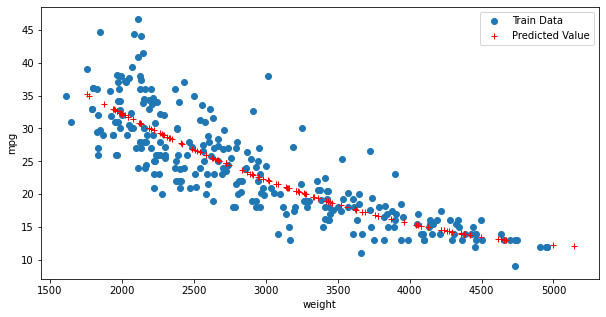

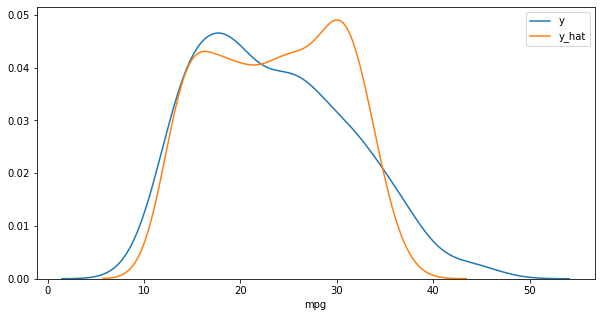

In [10]:
# <예제 7-2> 다항 회귀 분석
# step1 ~ 4 데이터 준비
# 훈련 데이터 274개, 검증 데이터 118개

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./auto-mpg.csv",header = None)
df.columns = ["mpg","cylinders","displacement","horsepower","weight",
             "acceleration","model year","origin","name"]

# horsepower열의 자료형 변경(문자열 -> 실수형)
df["horsepower"].replace("?",np.nan,inplace = True)
df.dropna(subset = ["horsepower"],axis = 0, inplace = True)
df["horsepower"] =df["horsepower"].astype("float")

# 분석에 활용할 얄 선택
ndf = df[["mpg","cylinders","horsepower","weight"]]

# ndf 데이터를 train data 와 test data로 구분(7:3)
X =ndf[["weight"]]
y = ndf["mpg"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state =10)
print("훈련 데이터: ", (X_train.shape))
print("검증 데이터: ", (X_test.shape))

print("\n")

'''
step 5 비선형 회귀 분석 모형 - sklearn 사용
- PolynomialFeatures(degree = n) -> n차항 객체 반환 -> poly 에 넣음
- poly(n차항 객체).fit_transform(X_train(훈련 데이터)) -> 훈련 데이털ㄹ 2차항으로 변환 -> X_train_poly 에 넣음
'''

# sklearn 라이브러리에서 필요한모듈 가져오기
from sklearn.linear_model import LinearRegression # 선형 회귀 분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)

print("원 데이터: ", X_train.shape)
print("2차항 변환 데이터: ", X_train_poly.shape)

print("\n")
# train_poly 데이터로 모형 학습
pr = LinearRegression() # 회귀분석 모형 객체 생성
pr.fit(X_train_poly, y_train) # pr모형 학습

# 학습을 마친모형에 test data를 적용하여 결졍계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test) # X_test 를 2차항으로 변환
r_square = pr.score(X_test_poly,y_test)
print("결정 계수: ",r_square)

print("\n")

# train data 의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig= plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train,"o",label = "Train Data") # 데이터 분포
ax.plot(X_test, y_hat_test,"r+",label = "Predicted Value") # 모형이 학습한 회귀선
ax.legend(loc = 'best')
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()
plt.close()

#  모형에 전체 X데이처를 입력하여 예측한 값 y_hat을 실제 y와 비교
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize = (10,5))
ax1 = sns.distplot(y, hist = False, label = "y")
ax2 = sns.distplot(y_hat, hist = False, label = "y_hat", ax =ax1)
plt.show()
plt.close()